## 1.Load der Python Pakete: 
Wie unter Punkt 1.1 Methoden beschrieben werden folgende Pakete benötigt und geladen

In [3]:
# Import the required libraries
import pandas as pd # Used for DataFrame
from google.colab import drive # Used for accessing the data on Google Drive
import matplotlib.pyplot as plt # Used to display the data using plots, charts, etc.
from scipy import stats # Used for statistical tests
import seaborn as sb # Used to display Box-Plots
# First we need to mount our Google Drive to access our files 

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## 2.Daten laden



Vorerst werden die TV-Nutzungsdaten (Figure 2. Data Flow Orange Felder)

In [4]:
# We have two files containing the results of surveys about Christmas Gifts Spending (one in 2020 and the other in 2021)
# Load the file paths in two variables

boosted= "/content/drive/MyDrive/CAS/Final Project/Colab/Werbeblöcke Instar boosted nach Update ab 1.1.22.xlsx"
nonboosted= "/content/drive/MyDrive/CAS/Final Project/Colab/Werbeblöcke Instar non-boosted ab 1.1.22.xlsx"


## 3.Datentypen anpassen, Variablen selektieren, Datensätze mergen

Nun werden die Datentypen angepasst, die Veriablen selektiert und dann die zwei Datensätzen aus den zwei verschiedenen Datenerhebungsverfahren so zusammengesetzt, dass Vergleiche möglich sind

In [5]:
# read data
header = 1 
df_boosted = pd.read_excel(boosted, header = header, sheet_name=1)
df_nonboosted = pd.read_excel(nonboosted, header = header, sheet_name=1)


In [6]:
#Select the relevant columns
df_s_boosted = df_boosted[['Datum', 'Sender', 'Dauer', 'Titel', 'Planzeit', 'CH-Inhaltscode','Standard-Inhaltscode', 'SendungsID', 'b Rt-T 3+' ]]
df_s_nonboosted = df_nonboosted[['Datum', 'Sender', 'Dauer', 'Titel', 'Planzeit', 'CH-Inhaltscode','Standard-Inhaltscode', 'SendungsID', 'nb Rt-T 3+' ]]

In [7]:
# Key für das mergen der Datansätze erstellen
df_s_boosted = df_s_boosted.astype({"Planzeit":'str',"Datum":'str'})
df_s_nonboosted = df_s_nonboosted.astype({"Planzeit":'str',"Datum":'str'})
df_s_boosted['helpkey'] = df_s_boosted[['Datum','Sender','Planzeit']].apply(''.join, axis=1)
df_s_nonboosted['helpkey'] = df_s_nonboosted[['Datum','Sender','Planzeit']].apply(''.join, axis=1)


In [8]:
#Kurze Übersicht
print(df_s_boosted.dtypes)
print(df_s_nonboosted.dtypes)

Datum                    object
Sender                   object
Dauer                    object
Titel                    object
Planzeit                 object
CH-Inhaltscode           object
Standard-Inhaltscode      int64
SendungsID                int64
b Rt-T 3+               float64
helpkey                  object
dtype: object
Datum                    object
Sender                   object
Dauer                    object
Titel                    object
Planzeit                 object
CH-Inhaltscode           object
Standard-Inhaltscode      int64
SendungsID                int64
nb Rt-T 3+              float64
helpkey                  object
dtype: object


In [9]:
# über den Key mergen
merge = df_s_nonboosted.merge(df_s_boosted, how='inner', on='helpkey')

In [10]:
#Doppelte Spalten bereiningen
df_s_merge = merge[['Datum_x', 'Sender_x', 'helpkey',  'Dauer_x', 'Titel_x', 'Planzeit_x', 'CH-Inhaltscode_x','Standard-Inhaltscode_x', 'SendungsID_x', 'b Rt-T 3+','nb Rt-T 3+']]

In [11]:
# Changing the datatype of Date, from
# Object to datetime64
df_s_merge = df_s_merge.astype({"SendungsID_x":'object', "Standard-Inhaltscode_x":'object', "Datum_x":'datetime64'})

In [12]:
# Setting the Date as index
df_s_merge['Datum']=df_s_merge['Datum_x']
df_s_merge = df_s_merge.set_index("Datum")

## 4.Variablen berechnen

In [13]:
# Aus Datum Jahr, Monat und Woche ableiten
df_s_merge['Datum'] = df_s_merge.index
df_s_merge['Year'] = df_s_merge['Datum'].dt.year
df_s_merge['Month'] = df_s_merge['Datum'].dt.month
df_s_merge['Week'] = df_s_merge['Datum'].dt.isocalendar().week

In [14]:
df_s_merge['Veränderung'] = df_s_merge['b Rt-T 3+'] - df_s_merge['nb Rt-T 3+']

## 5.Übersicht über das Analyse-File (Grundlage)

In [15]:
print(df_s_merge.dtypes)
df_s_merge

Datum_x                   datetime64[ns]
Sender_x                          object
helpkey                           object
Dauer_x                           object
Titel_x                           object
Planzeit_x                        object
CH-Inhaltscode_x                  object
Standard-Inhaltscode_x            object
SendungsID_x                      object
b Rt-T 3+                        float64
nb Rt-T 3+                       float64
Datum                     datetime64[ns]
Year                               int64
Month                              int64
Week                              UInt32
Veränderung                      float64
dtype: object


,Datum_x,Sender_x,helpkey,Dauer_x,Titel_x,Planzeit_x,CH-Inhaltscode_x,Standard-Inhaltscode_x,SendungsID_x,b Rt-T 3+,nb Rt-T 3+,Datum,Year,Month,Week,Veränderung
Datum,,,,,,,,,,,,,,,,
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 109:40:00,00:00:56,WERBUNG SRF 1 / 09:40,09:40:00,B31,9901000001,80884034,15.901589,12.070,2022-01-01,2022,1,52,3.831589
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 112:52:00,00:02:26,WERBUNG SRF 1 / 11:10,12:52:00,B31,9901000001,80884045,39.400195,33.916,2022-01-01,2022,1,52,5.484195
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 111:17:00,00:01:08,WERBUNG SRF 1 / 11:17,11:17:00,B34,9901000011,80884047,49.819677,47.938,2022-01-01,2022,1,52,1.881677
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 113:05:00,00:02:37,WERBUNG SRF 1 / 13:35,13:05:00,B31,9901000001,80884053,101.275029,102.926,2022-01-01,2022,1,52,-1.650971
2022-01-01,2022-01-01,SRF 1,01.01.2022SRF 114:15:00,00:00:48,WERBUNG SRF 1 / 13:45,14:15:00,B31,9901000001,80884058,74.599106,76.191,2022-01-01,2022,1,52,-1.591894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,2022-06-30,SRF info,30.06.2022SRF info1900-01-01 01:05:00,00:01:04,WERBUNG SRF INFO / 25:05,1900-01-01 01:05:00,B31,9901000001,83011332,5.344969,3.816,2022-06-30,2022,6,26,1.528969
2022-06-30,2022-06-30,SRF info,30.06.2022SRF info1900-01-01 01:38:00,00:01:05,WERBUNG SRF INFO / 25:38,1900-01-01 01:38:00,B38,9901000021,83011336,4.696300,3.816,2022-06-30,2022,6,26,0.880300
2022-06-30,2022-06-30,SRF info,30.06.2022SRF info1900-01-01 01:42:00,00:01:04,WERBUNG SRF INFO / 02:18,1900-01-01 01:42:00,B31,9901000001,83011344,4.557900,3.816,2022-06-30,2022,6,26,0.741900


df_contacts als Datafile für Visualisierungen festlegen

## 5.Analysefile filtern

In [16]:
df_s_merge = df_s_merge.astype({"Month":'str', "Week":'str'})

In [17]:
values=['1','2','3','4','5','6']
df_contacts = df_s_merge[df_s_merge.Month.isin(values)]

# 6.Datenvergleich (Daten aus den zwei verschiednen Datenerhebungsverfahren)



### Auf Datum

Betrachtung Perioden

In [18]:
# pivotieren
piv_datum = pd.pivot_table(df_contacts,index=["Datum_x"])

In [19]:
print(piv_datum.dtypes)

Veränderung    float64
Year             int64
b Rt-T 3+      float64
nb Rt-T 3+     float64
dtype: object


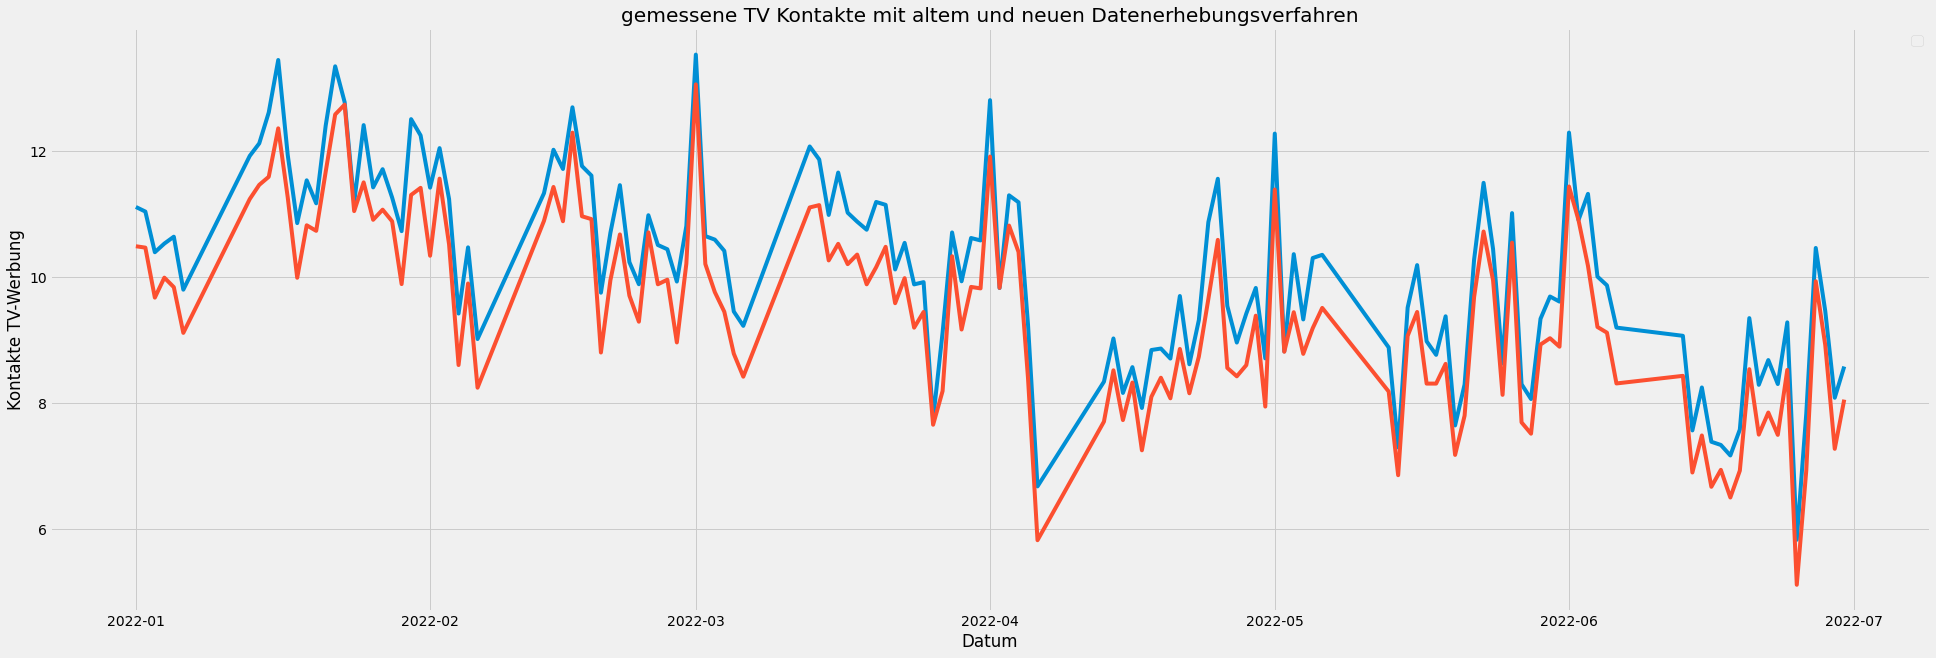

In [20]:

 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(30, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Datum")
plt.ylabel("Kontakte TV-Werbung")
plt.title("gemessene TV Kontakte mit altem und neuen Datenerhebungsverfahren")
 
# plotting the "A" column and "A" column
# of Rolling Dataframe (window_size  = 20)
plt.plot(piv_datum["b Rt-T 3+"])
plt.plot(piv_datum["nb Rt-T 3+"])
plt.legend()


## auf Monat

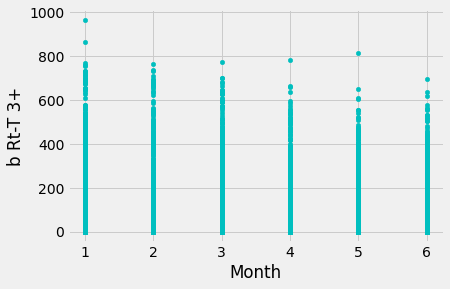

In [21]:
# Plot 
ax = df_contacts.plot(x=('Month'),y='b Rt-T 3+',kind="scatter",c='c')
##plt.plot(income, intercept + slope*income, 'b', label='Fitted treated line')
plt.show()


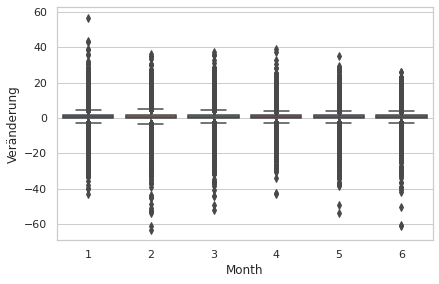

In [22]:
sb.set(style='whitegrid')
 
sb.boxplot(x="Month",
                y="Veränderung",
                data=df_contacts)

In [23]:
# pivotieren auf Monat
piv_month = pd.pivot_table(df_contacts,index=["Month"])
piv_month

,Veränderung,Year,b Rt-T 3+,nb Rt-T 3+
Month,,,,
1,0.682176,2022,11.642617,10.960441
2,0.669033,2022,10.868736,10.199704
3,0.705804,2022,10.561982,9.856178
4,0.655773,2022,9.351734,8.695962
5,0.609351,2022,9.467781,8.858430
6,0.706687,2022,8.774439,8.067752


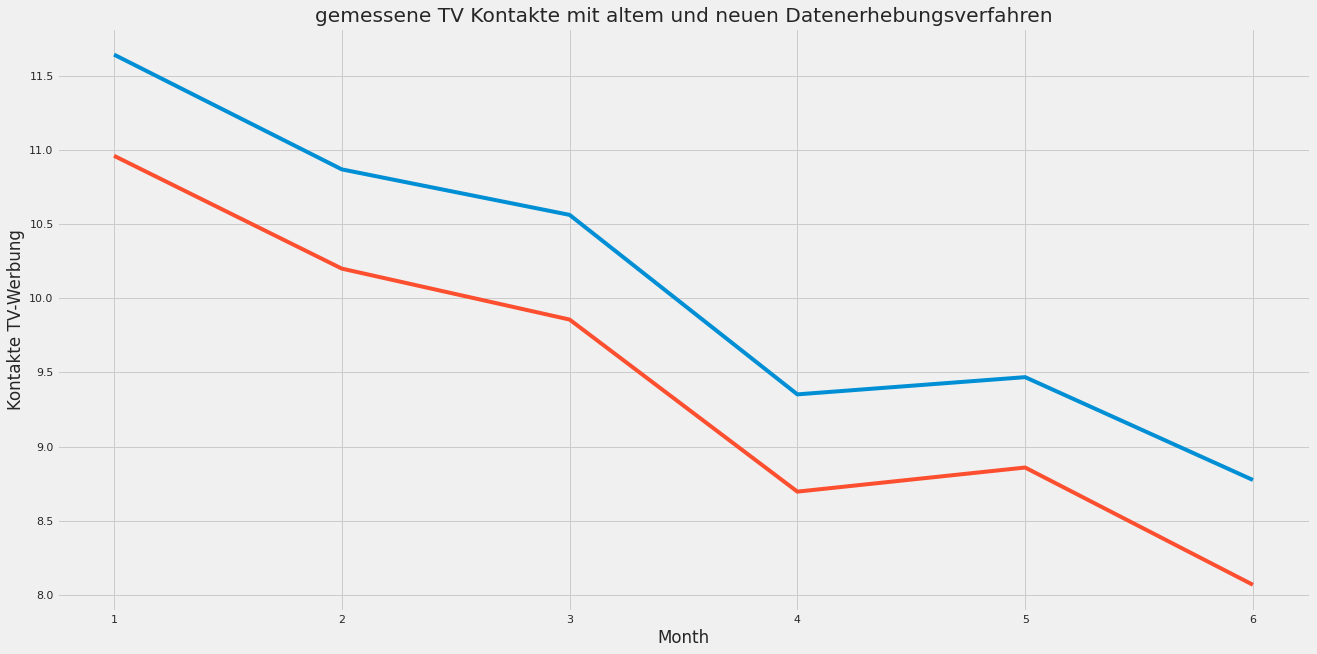

In [24]:
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(20, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Month")
plt.ylabel("Kontakte TV-Werbung")
plt.title("gemessene TV Kontakte mit altem und neuen Datenerhebungsverfahren")
 
# plotting the "A" column and "A" column
# of Rolling Dataframe (window_size  = 20)
plt.plot(piv_month["b Rt-T 3+"])
plt.plot(piv_month["nb Rt-T 3+"])


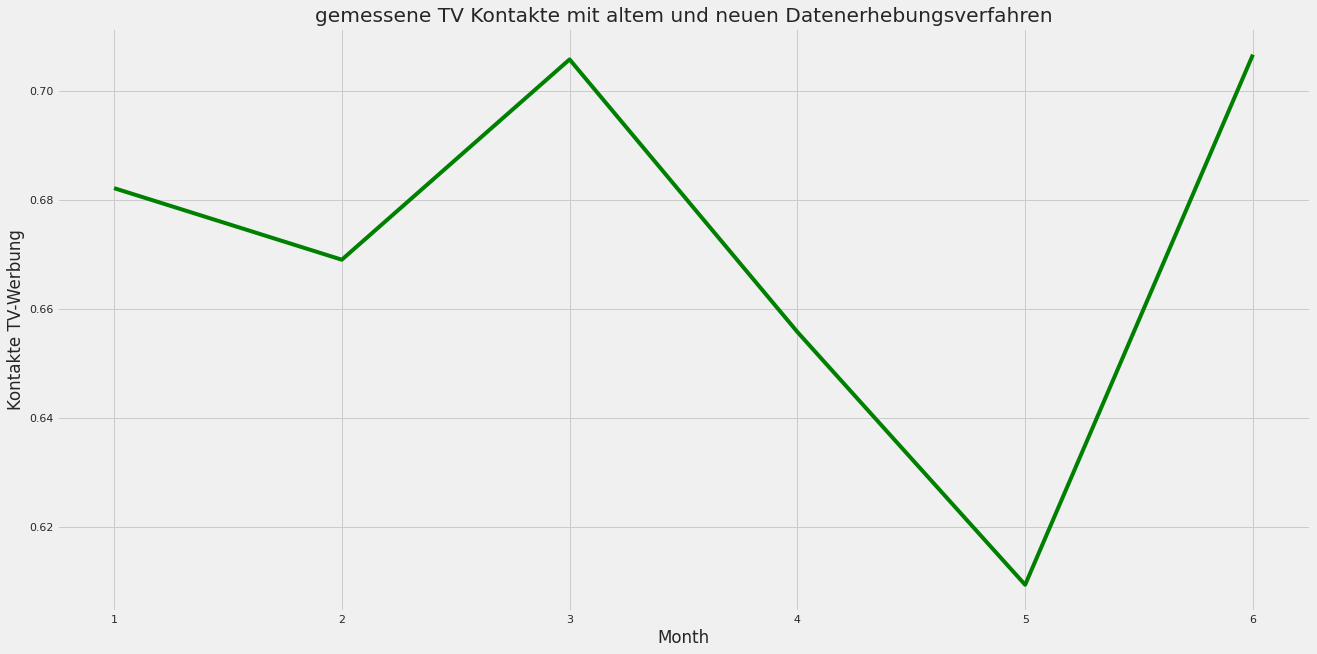

In [25]:
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(20, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Month")
plt.ylabel("Kontakte TV-Werbung")
plt.title("gemessene TV Kontakte mit altem und neuen Datenerhebungsverfahren")
 
# plotting the "A" column and "A" column
# of Rolling Dataframe (window_size  = 20)
plt.plot(piv_month["Veränderung"], color='green')


## auf Sender





In [26]:
# pivotieren
piv_sender = pd.pivot_table(df_contacts,index=["Sender_x"])

In [27]:
piv_sender

,Veränderung,Year,b Rt-T 3+,nb Rt-T 3+
Sender_x,,,,
3+,-0.187324,2022,10.153429,10.340753
4+,0.226521,2022,6.034134,5.807613
5+,-0.081536,2022,4.261207,4.342743
6+,0.183259,2022,2.099775,1.916516
6ter CH,-0.171943,2022,1.996950,2.168893
AB3 CH,0.188298,2022,1.877969,1.689671
C8 CH,0.835443,2022,2.708408,1.872965
Cartoon Network CH,0.273178,2022,1.514410,1.241232
DMAX CH,0.506867,2022,2.773178,2.266311


In [28]:
print(piv_sender.dtypes)

Veränderung    float64
Year             int64
b Rt-T 3+      float64
nb Rt-T 3+     float64
dtype: object


In [29]:
piv_sender_sort = piv_sender.sort_values(by=['Veränderung'], ascending=False)
piv_sender_sort

,Veränderung,Year,b Rt-T 3+,nb Rt-T 3+
Sender_x,,,,
TRC_DS,10.233839,2022,118.765936,108.532097
TF1 CH,3.800153,2022,18.397589,14.597436
RTL CH,2.729708,2022,21.013434,18.283725
SRF zwei,2.569208,2022,38.670603,36.101396
SRF 1,2.436124,2022,109.187070,106.750946
ProSieben CH,1.719561,2022,11.160550,9.440988
RTS 2,1.590201,2022,13.452446,11.862245
RTS 1,1.433246,2022,47.117132,45.683886
SRF info,1.145808,2022,9.549300,8.403491


In [30]:
values=['SRF 1','RTS 1', 'SRF zwei', 'RTL CH', 'TF1 CH', 'TeleZüri', 'VOX CH', 'RTS 2', 'M6 CH', 'SAT.1 CH']
df_sender = df_contacts[df_contacts.Sender_x.isin(values)]
print(df_sender)

              Datum_x Sender_x                   helpkey   Dauer_x  \
Datum                                                                
2022-01-01 2022-01-01    SRF 1   01.01.2022SRF 109:40:00  00:00:56   
2022-01-01 2022-01-01    SRF 1   01.01.2022SRF 112:52:00  00:02:26   
2022-01-01 2022-01-01    SRF 1   01.01.2022SRF 111:17:00  00:01:08   
2022-01-01 2022-01-01    SRF 1   01.01.2022SRF 113:05:00  00:02:37   
2022-01-01 2022-01-01    SRF 1   01.01.2022SRF 114:15:00  00:00:48   
...               ...      ...                       ...       ...   
2022-06-30 2022-06-30   TF1 CH  30.06.2022TF1 CH20:42:00  00:03:14   
2022-06-30 2022-06-30   TF1 CH  30.06.2022TF1 CH20:54:00  00:06:13   
2022-06-30 2022-06-30   TF1 CH  30.06.2022TF1 CH21:44:00  00:06:11   
2022-06-30 2022-06-30   TF1 CH  30.06.2022TF1 CH22:03:00  00:06:09   
2022-06-30 2022-06-30   TF1 CH  30.06.2022TF1 CH22:13:00  00:06:07   

                           Titel_x Planzeit_x CH-Inhaltscode_x  \
Datum                  

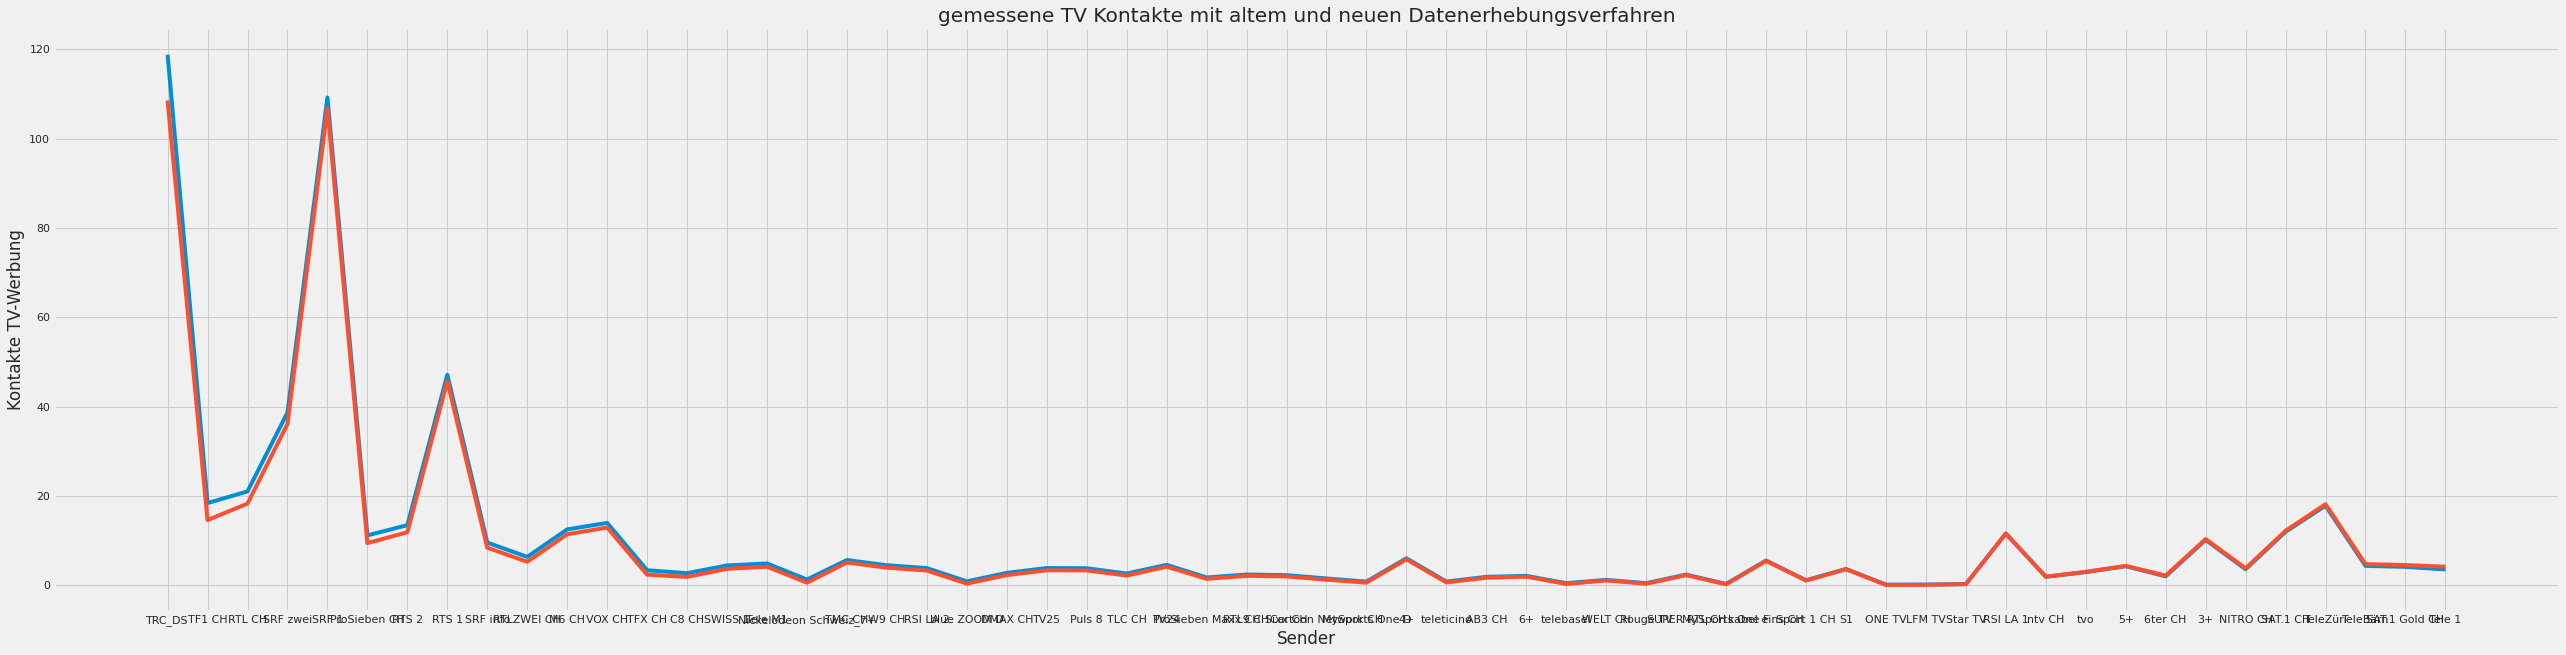

In [31]:
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(40, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Sender")
plt.ylabel("Kontakte TV-Werbung")
plt.title("gemessene TV Kontakte mit altem und neuen Datenerhebungsverfahren")
 
# plotting the "A" column and "A" column
# of Rolling Dataframe (window_size  = 20)
plt.plot(piv_sender_sort["b Rt-T 3+"])
plt.plot(piv_sender_sort["nb Rt-T 3+"])


## Statistische Vergleiche

Prüfung ob Normalverteilung der Nutzungsdaten mit dem D Agostino-Pearson Test

In [32]:
k2, p = stats.normaltest(df_contacts['b Rt-T 3+']) # D Agostino-Pearson. 
alpha = 0.05 
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  
     print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

Alpha =  0.05
p =  0.0
The null hypothesis can be rejected


Prüfung der Signifikanz der Unterschiede zwischen Daten aus altem und aus neuem Datenerhebungsverfehren

In [33]:
stats.mannwhitneyu(df_contacts['b Rt-T 3+'],df_contacts['nb Rt-T 3+'], alternative='two-sided')

MannwhitneyuResult(statistic=31905207003.5, pvalue=0.0)

Prüfung der Signifikanz der Unterschiede zwischen Daten aus altem und aus neuem Datenerhebungsverfehren bei SRF 1 (dem grössten Sender)

In [34]:
values=['SRF 1','RTS 1', 'SRF zwei', 'RTL CH', 'TF1 CH', 'TeleZüri', 'VOX CH', 'RTS 2', 'M6 CH', 'SAT.1 CH']
df_sender = df_contacts[df_contacts.Sender_x.isin(values)]

In [35]:
values=['SRF 1']
df_contacts_srf1 = df_contacts[df_contacts.Sender_x.isin(values)]

In [36]:
stats.mannwhitneyu(df_contacts_srf1['b Rt-T 3+'],df_contacts_srf1['nb Rt-T 3+'], alternative='two-sided')

MannwhitneyuResult(statistic=15084394.0, pvalue=1.0731468680058572e-19)

Prüfung der Signifikanz der Unterschiede zwischen Daten aus altem und aus neuem Datenerhebungsverfehren bei TF 1 (dem Sender mit der grössten Veränderung)

In [37]:
values=['TF1 CH']
df_contacts_tf1 = df_contacts[df_contacts.Sender_x.isin(values)]

In [38]:
stats.mannwhitneyu(df_contacts_tf1['b Rt-T 3+'],df_contacts_tf1['nb Rt-T 3+'], alternative='two-sided')

MannwhitneyuResult(statistic=10351069.5, pvalue=6.756728879264081e-57)

In [42]:
stats.mannwhitneyu(piv_month['b Rt-T 3+'],piv_month['nb Rt-T 3+'], alternative='two-sided')

MannwhitneyuResult(statistic=24.0, pvalue=0.3939393939393939)